# **K-Nearest Neighbors Classifier**

## Objectives
* Use K-Nearest neighbors to classify data
* Apply KNN Classifier on a real world data set

---

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## About the Data Set

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such a region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our objective is to build a classifier to predict the service category for unknown cases. We will use a specific type of classification called K-nearest neighbors.

#### Load Data

In [5]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
data = pd.read_csv(path)

In [6]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


All features have been numerical, and there's no single missing values.

### Data Visualization and Analysis

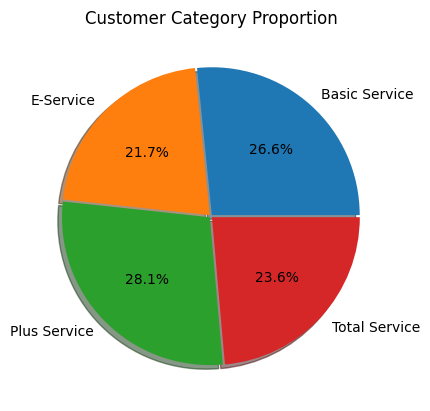

In [37]:
pie = data['custcat'].value_counts().sort_index()
labels = ['Basic Service', 'E-Service', 'Plus Service', 'Total Service']

plt.pie(pie, labels=labels, autopct='%1.1f%%', explode=[0.01] * 4, shadow=True)
plt.title("Customer Category Proportion")
plt.show()

All `custcat` (target) classes are mostly balanced and requires no special means of accounting for classes bias.

We can also visualize the correlation map of the dataset to determine how the different features are related to each other.

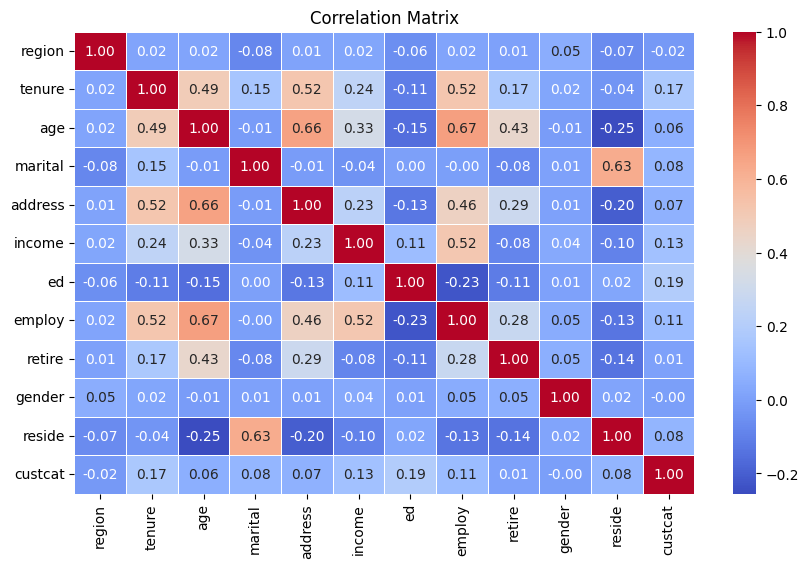

In [46]:
corr = data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

From the correlation map, some features have better correlation among them than others, basically indicating the depth of relationship between the two features. What is of interest to us is the correlation of the target feature, i.e. `custcat` with all the other features. This will help us identify which features should be focussed on for modelling and which ones can be ignored.

The following code snippet will give us list of features sorted in the descending order of their absolute correlation values with respect to the target field.

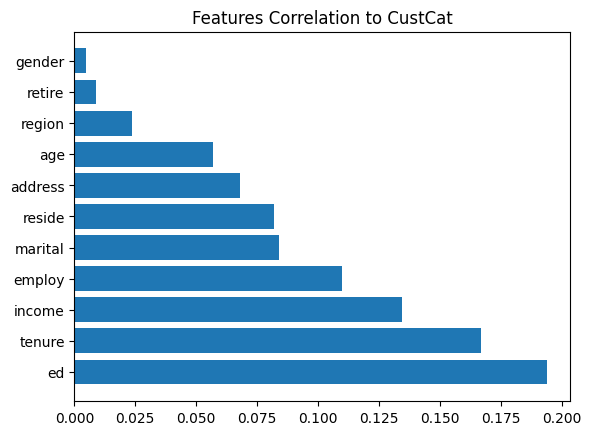

In [60]:
target_corr = corr['custcat'].abs().sort_values(ascending=False).drop('custcat')
plt.barh(target_corr.index, target_corr.values)
plt.title("Features Correlation to CustCat")
plt.show()

This shows us that the features `retire` and `gender` have the least impact on `custcat` while `ed`, `tenure`, and `income` have the most impact.

Let's check data distribution, for this dataset.

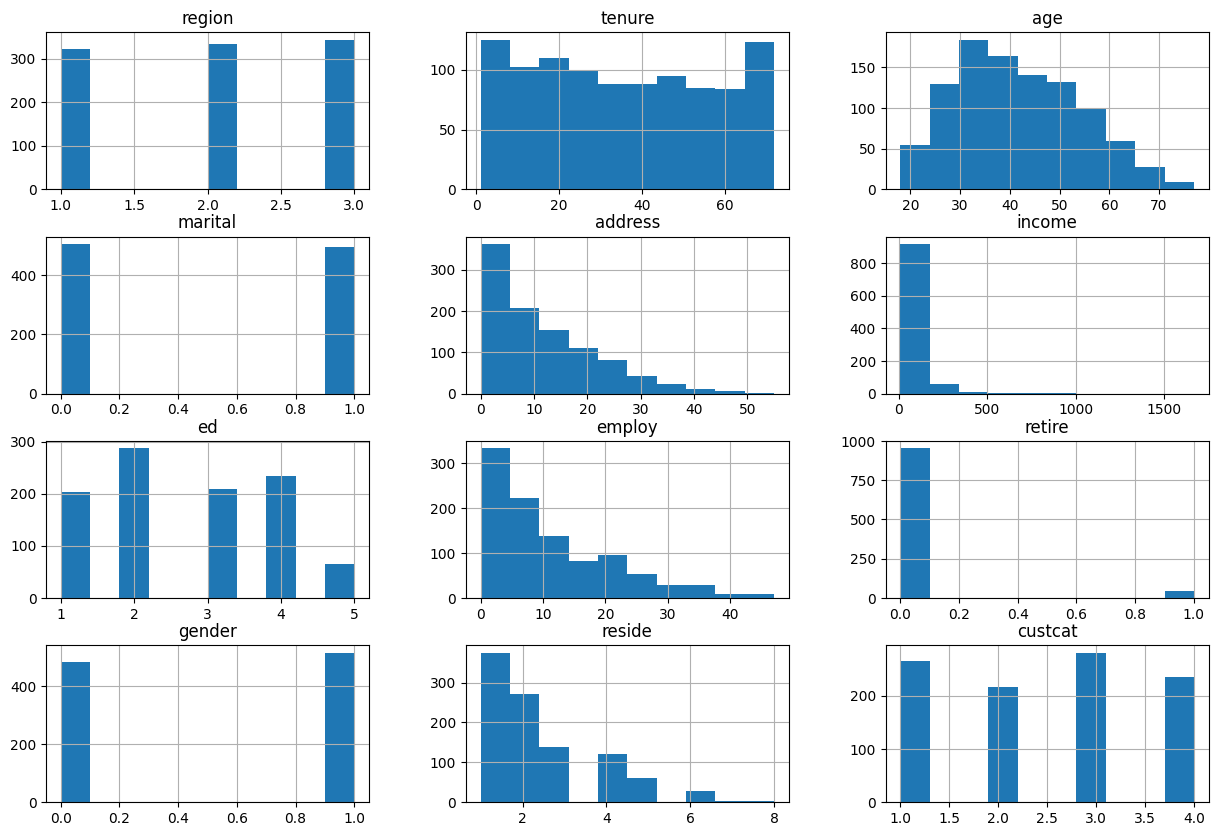

In [67]:
data.hist(figsize=(15, 10))
plt.show()

---

### Preprocessing Data

#### Seperate Features and Target

In [61]:
X = data.drop('custcat', axis=1)
y = data['custcat']

In [62]:
X

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3
996,1,7,34,0,2,22.0,5,5,0.0,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1
998,3,70,49,0,18,87.0,2,22,0.0,1,1
